<a href="https://colab.research.google.com/github/juunnn/DTSAI2019/blob/master/D20_JunaediFahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
---


## Load Data from GDrive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Day\ 20/dnn_app_utils_v3.py .
!cp -r /content/drive/My\ Drive/Day\ 20/datasets datasets
!python dnn_app_utils_v3.py

## import Library yang dibutuhkan

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Load data ke dalam environtment

In [0]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

### Coba lihat satu gambar

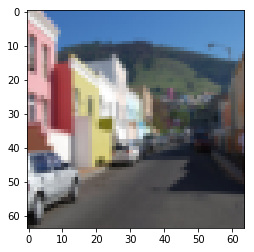

In [0]:
plt.imshow(train_x_orig[1])

### Lihat keadaan data dulu

In [0]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: ", m_train)
print("Number of test example: ",m_test)

Number of training examples:  209
Number of test example:  50


## Ubah image kedalam bentuk array

In [0]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255
print("train_x_flatten shape :",train_x_flatten.shape)
print("test_x_flatten:",test_x_flatten.shape)

train_x_flatten shape : (12288, 209)
test_x_flatten: (12288, 50)


In [0]:
n_x = 64*64*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

## Definisikan fungsi MLP

In [0]:
def two_layers_model(X, Y, layers_dims, learning_rate=0.0075, num_iteration=3000, print_cost=False):
  np.random.seed(1)
  grads = {}
  costs = []
  m = X.shape[1]

  (n_x, n_h, n_y) = layers_dims

  parameters = initialize_parameters(n_x, n_h, n_y)


  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  for i in range(0, num_iteration):
    A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
    A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

    cost = compute_cost(A2, Y)

    dA2 = - (np.divide(Y, A2) - np.divide(1 -Y, 1-A2) )

    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2

    parameters = update_parameters(parameters, grads, learning_rate)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    if print_cost and i%100 == 0:
      print("Cost after iteration {}: {}".format(i, np.squeeze(cost)) )
    if print_cost and i%10 == 0:
      costs.append(cost)
  
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
  return parameters

## Run training

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764731
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096967
Cost after iteration 1700: 0.11306524562164705
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726867
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074

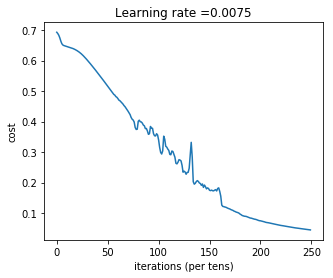

In [0]:
parameters_2 = two_layers_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iteration = 2500, print_cost=True)

## Run testing

In [0]:
predict_2_train = predict(train_x, train_y, parameters_2)

Accuracy: 0.9999999999999998


In [0]:
predict_2_test = predict(test_x, test_y, parameters_2)

Accuracy: 0.72


In [0]:
layers_dims = [64*64*3, 20, 7 , 5, 1]

## Definiskan MLP

Cost after iteration 0: 0.772
Cost after iteration 100: 0.672
Cost after iteration 200: 0.648
Cost after iteration 300: 0.612
Cost after iteration 400: 0.567
Cost after iteration 500: 0.540
Cost after iteration 600: 0.528
Cost after iteration 700: 0.465
Cost after iteration 800: 0.369
Cost after iteration 900: 0.392
Cost after iteration 1000: 0.315
Cost after iteration 1100: 0.273
Cost after iteration 1200: 0.237
Cost after iteration 1300: 0.200
Cost after iteration 1400: 0.189
Cost after iteration 1500: 0.161
Cost after iteration 1600: 0.148
Cost after iteration 1700: 0.138
Cost after iteration 1800: 0.130
Cost after iteration 1900: 0.121
Cost after iteration 2000: 0.114
Cost after iteration 2100: 0.108
Cost after iteration 2200: 0.103
Cost after iteration 2300: 0.101
Cost after iteration 2400: 0.093


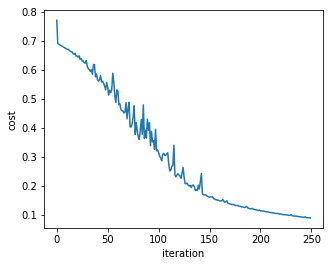

In [0]:
def L_layers_models(X, Y, layers_dims, lr = 0.0075, n_iter = 3000, print_cost=False):
  np.random.seed(1)
  costs = []

  parameters = initialize_parameters_deep(layers_dims)

  for i in range(0, n_iter):
    AL, chaces = L_model_forward(X, parameters)

    cost = compute_cost(AL, Y)

    grads = L_model_backward(AL, Y, chaces)

    parameters = update_parameters(parameters, grads, lr)

    if print_cost and i%100 == 0:
      print("Cost after iteration %d: %.3f"%(i, cost))
    if print_cost and i%10 == 0:
      costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel("iteration")

  plt.show()

  return parameters



parameters_L = L_layers_models(train_x, train_y, layers_dims , n_iter = 2500, print_cost=True)

### Run test 

In [0]:
predict_L_train = predict(train_x, train_y, parameters_L)
predict_L_test = predict(test_x, test_y, parameters_L)

Accuracy: 0.9856459330143539
Accuracy: 0.8


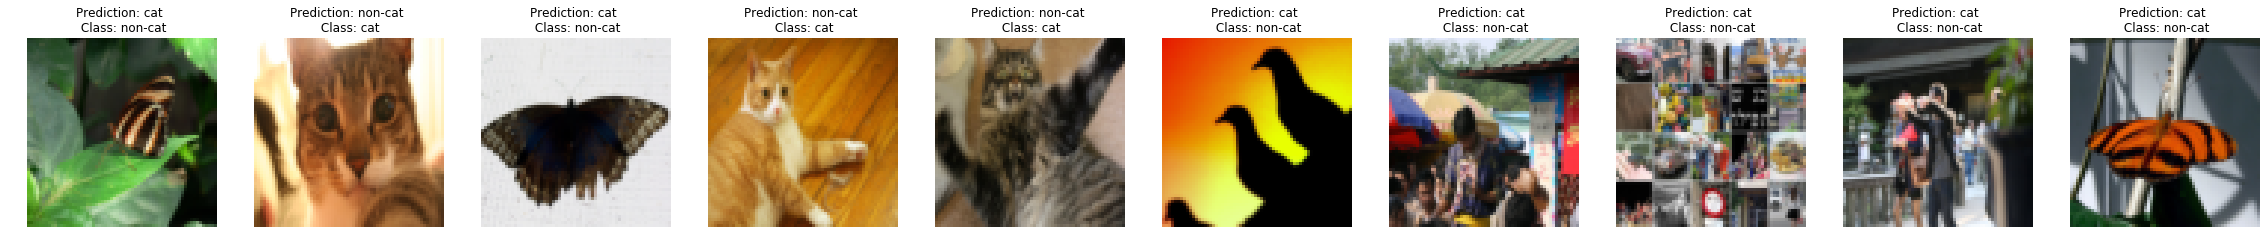

In [0]:
print_mislabeled_images(classes, test_x, test_y, predict_L_test)

In [0]:
!wget https://cdn.mos.cms.futurecdn.net/8xwXtTm5XzHenhimqM7LBU.jpg

--2019-07-29 13:13:15--  https://cdn.mos.cms.futurecdn.net/8xwXtTm5XzHenhimqM7LBU.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 8.252.163.124, 8.240.24.252, 67.26.235.252
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|8.252.163.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663444 (648K) [image/jpeg]
Saving to: ‘8xwXtTm5XzHenhimqM7LBU.jpg’

8xwXtTm5XzHenhimqM7 100%[===================>] 647.89K  --.-KB/s    in 0.05s   

2019-07-29 13:13:16 (12.1 MB/s) - ‘8xwXtTm5XzHenhimqM7LBU.jpg’ saved [663444/663444]



## Test with own image

(12288, 1)
Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


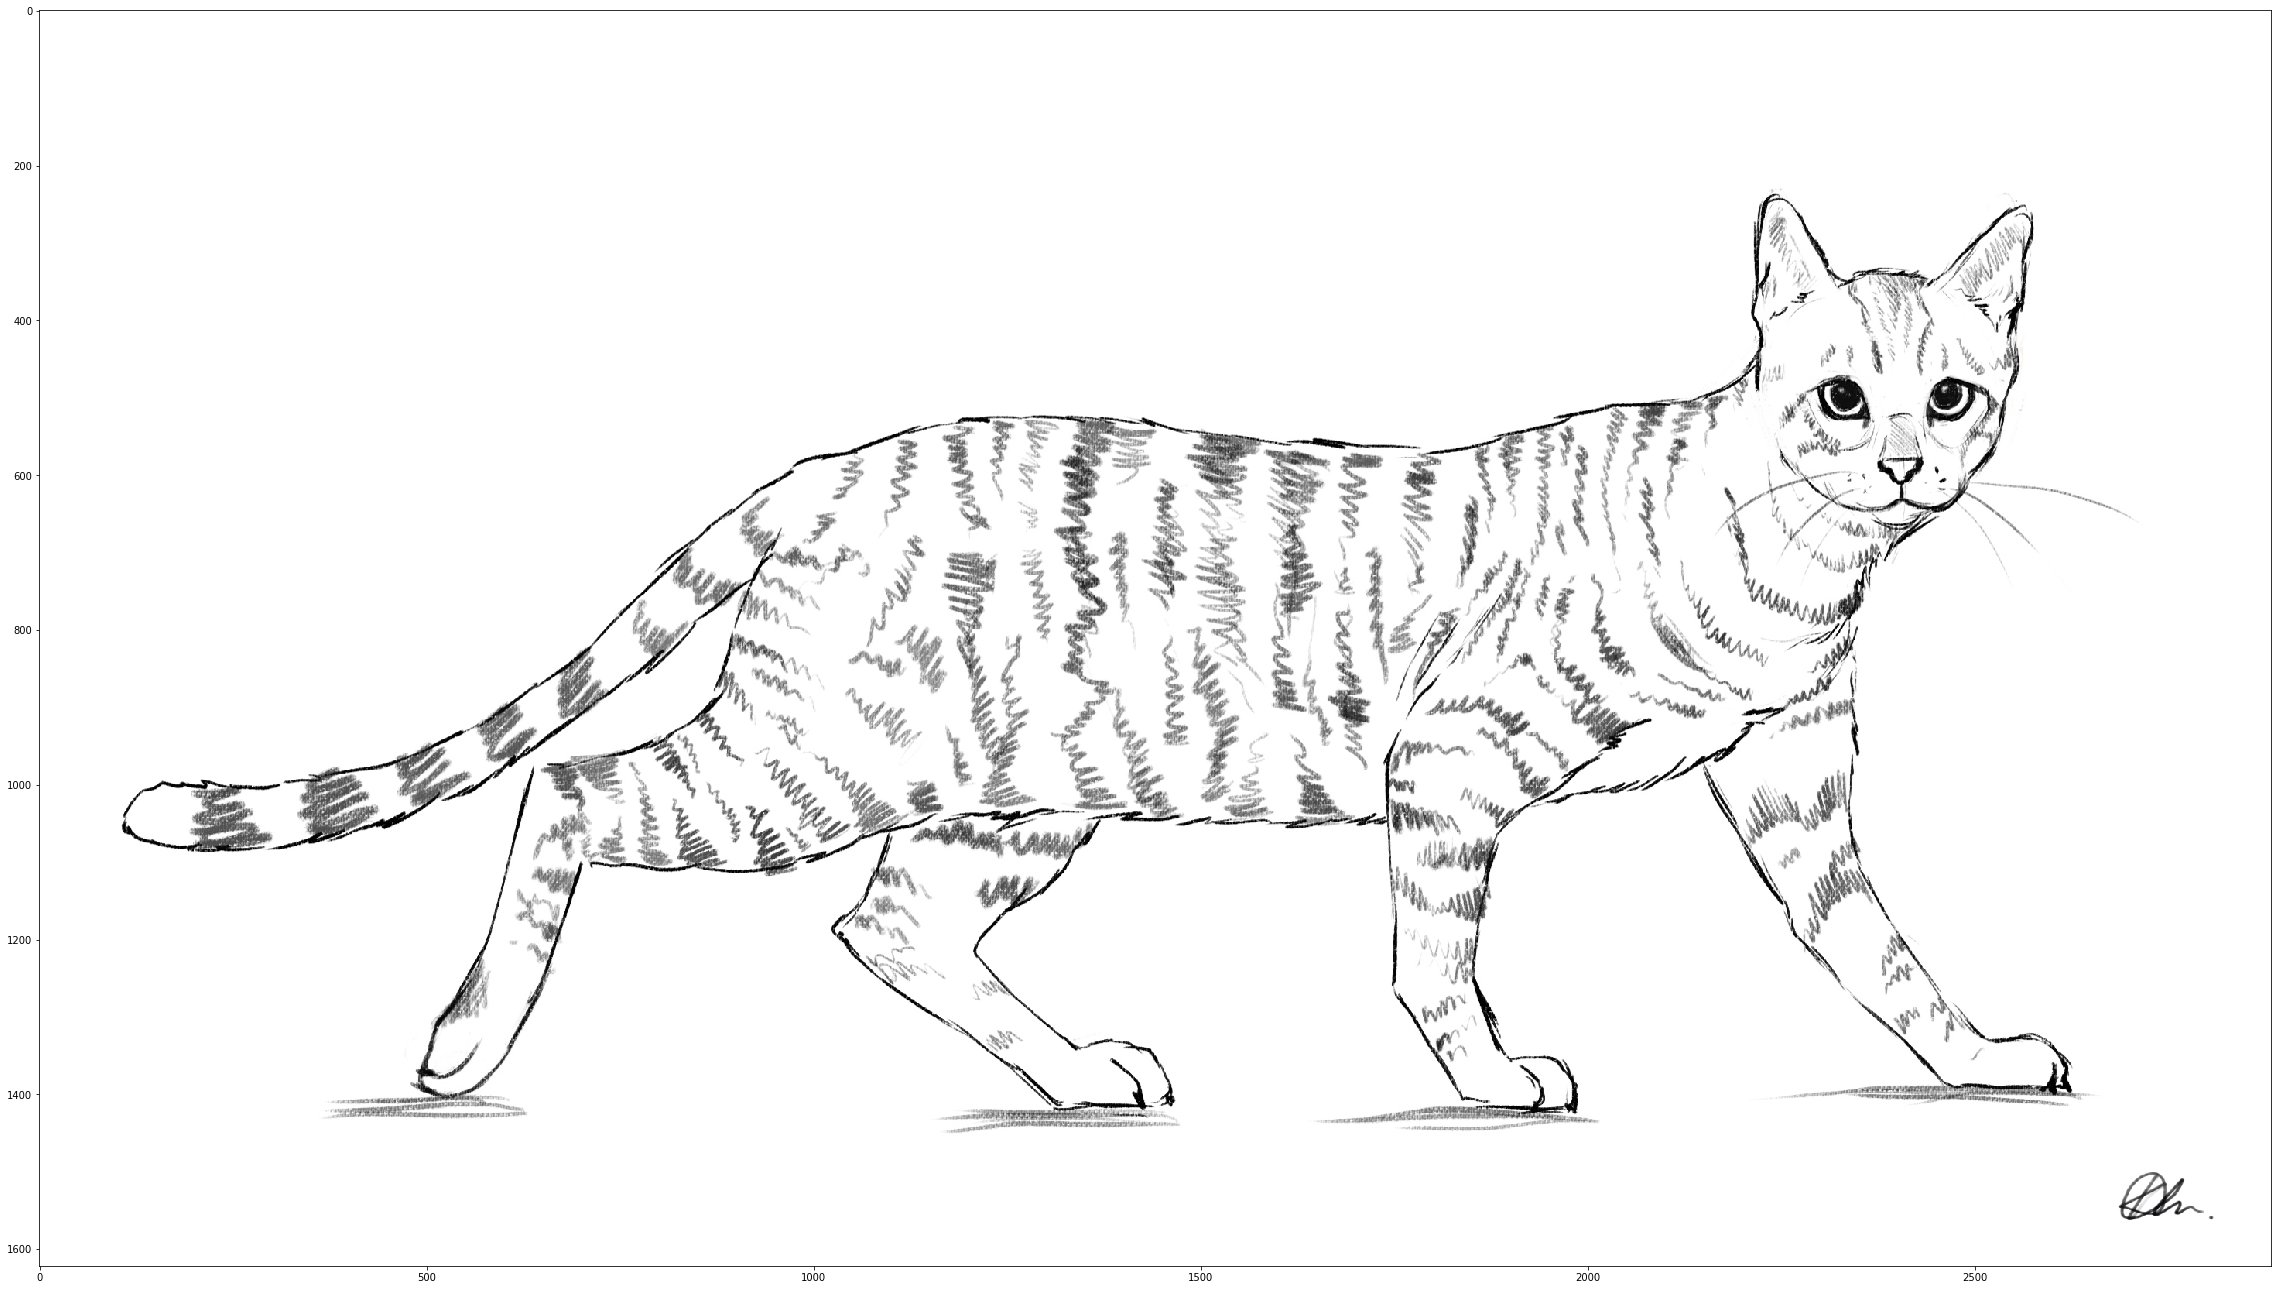

In [0]:
from skimage.transform import resize
my_image = "8xwXtTm5XzHenhimqM7LBU.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "/content/"+my_image
image = np.array(plt.imread(fname))
my_image = resize(image, (num_px,num_px))
my_image = my_image.flatten()
my_image = np.reshape(my_image, (64*64*3,1))
print(my_image.shape)
my_predicted_image = predict(my_image, my_label_y, parameters_L)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Cost after iteration 0: 0.703
Cost after iteration 100: 0.502
Cost after iteration 200: 0.428
Cost after iteration 300: 0.353
Cost after iteration 400: 0.292
Cost after iteration 500: 0.225
Cost after iteration 600: 0.146
Cost after iteration 700: 0.098
Cost after iteration 800: 0.066
Cost after iteration 900: 0.046
Cost after iteration 1000: 0.034
Cost after iteration 1100: 0.027
Cost after iteration 1200: 0.022
Cost after iteration 1300: 0.018
Cost after iteration 1400: 0.016
Cost after iteration 1500: 0.013
Cost after iteration 1600: 0.012
Cost after iteration 1700: 0.010
Cost after iteration 1800: 0.009
Cost after iteration 1900: 0.008
Cost after iteration 2000: 0.007
Cost after iteration 2100: 0.007
Cost after iteration 2200: 0.006
Cost after iteration 2300: 0.006
Cost after iteration 2400: 0.005


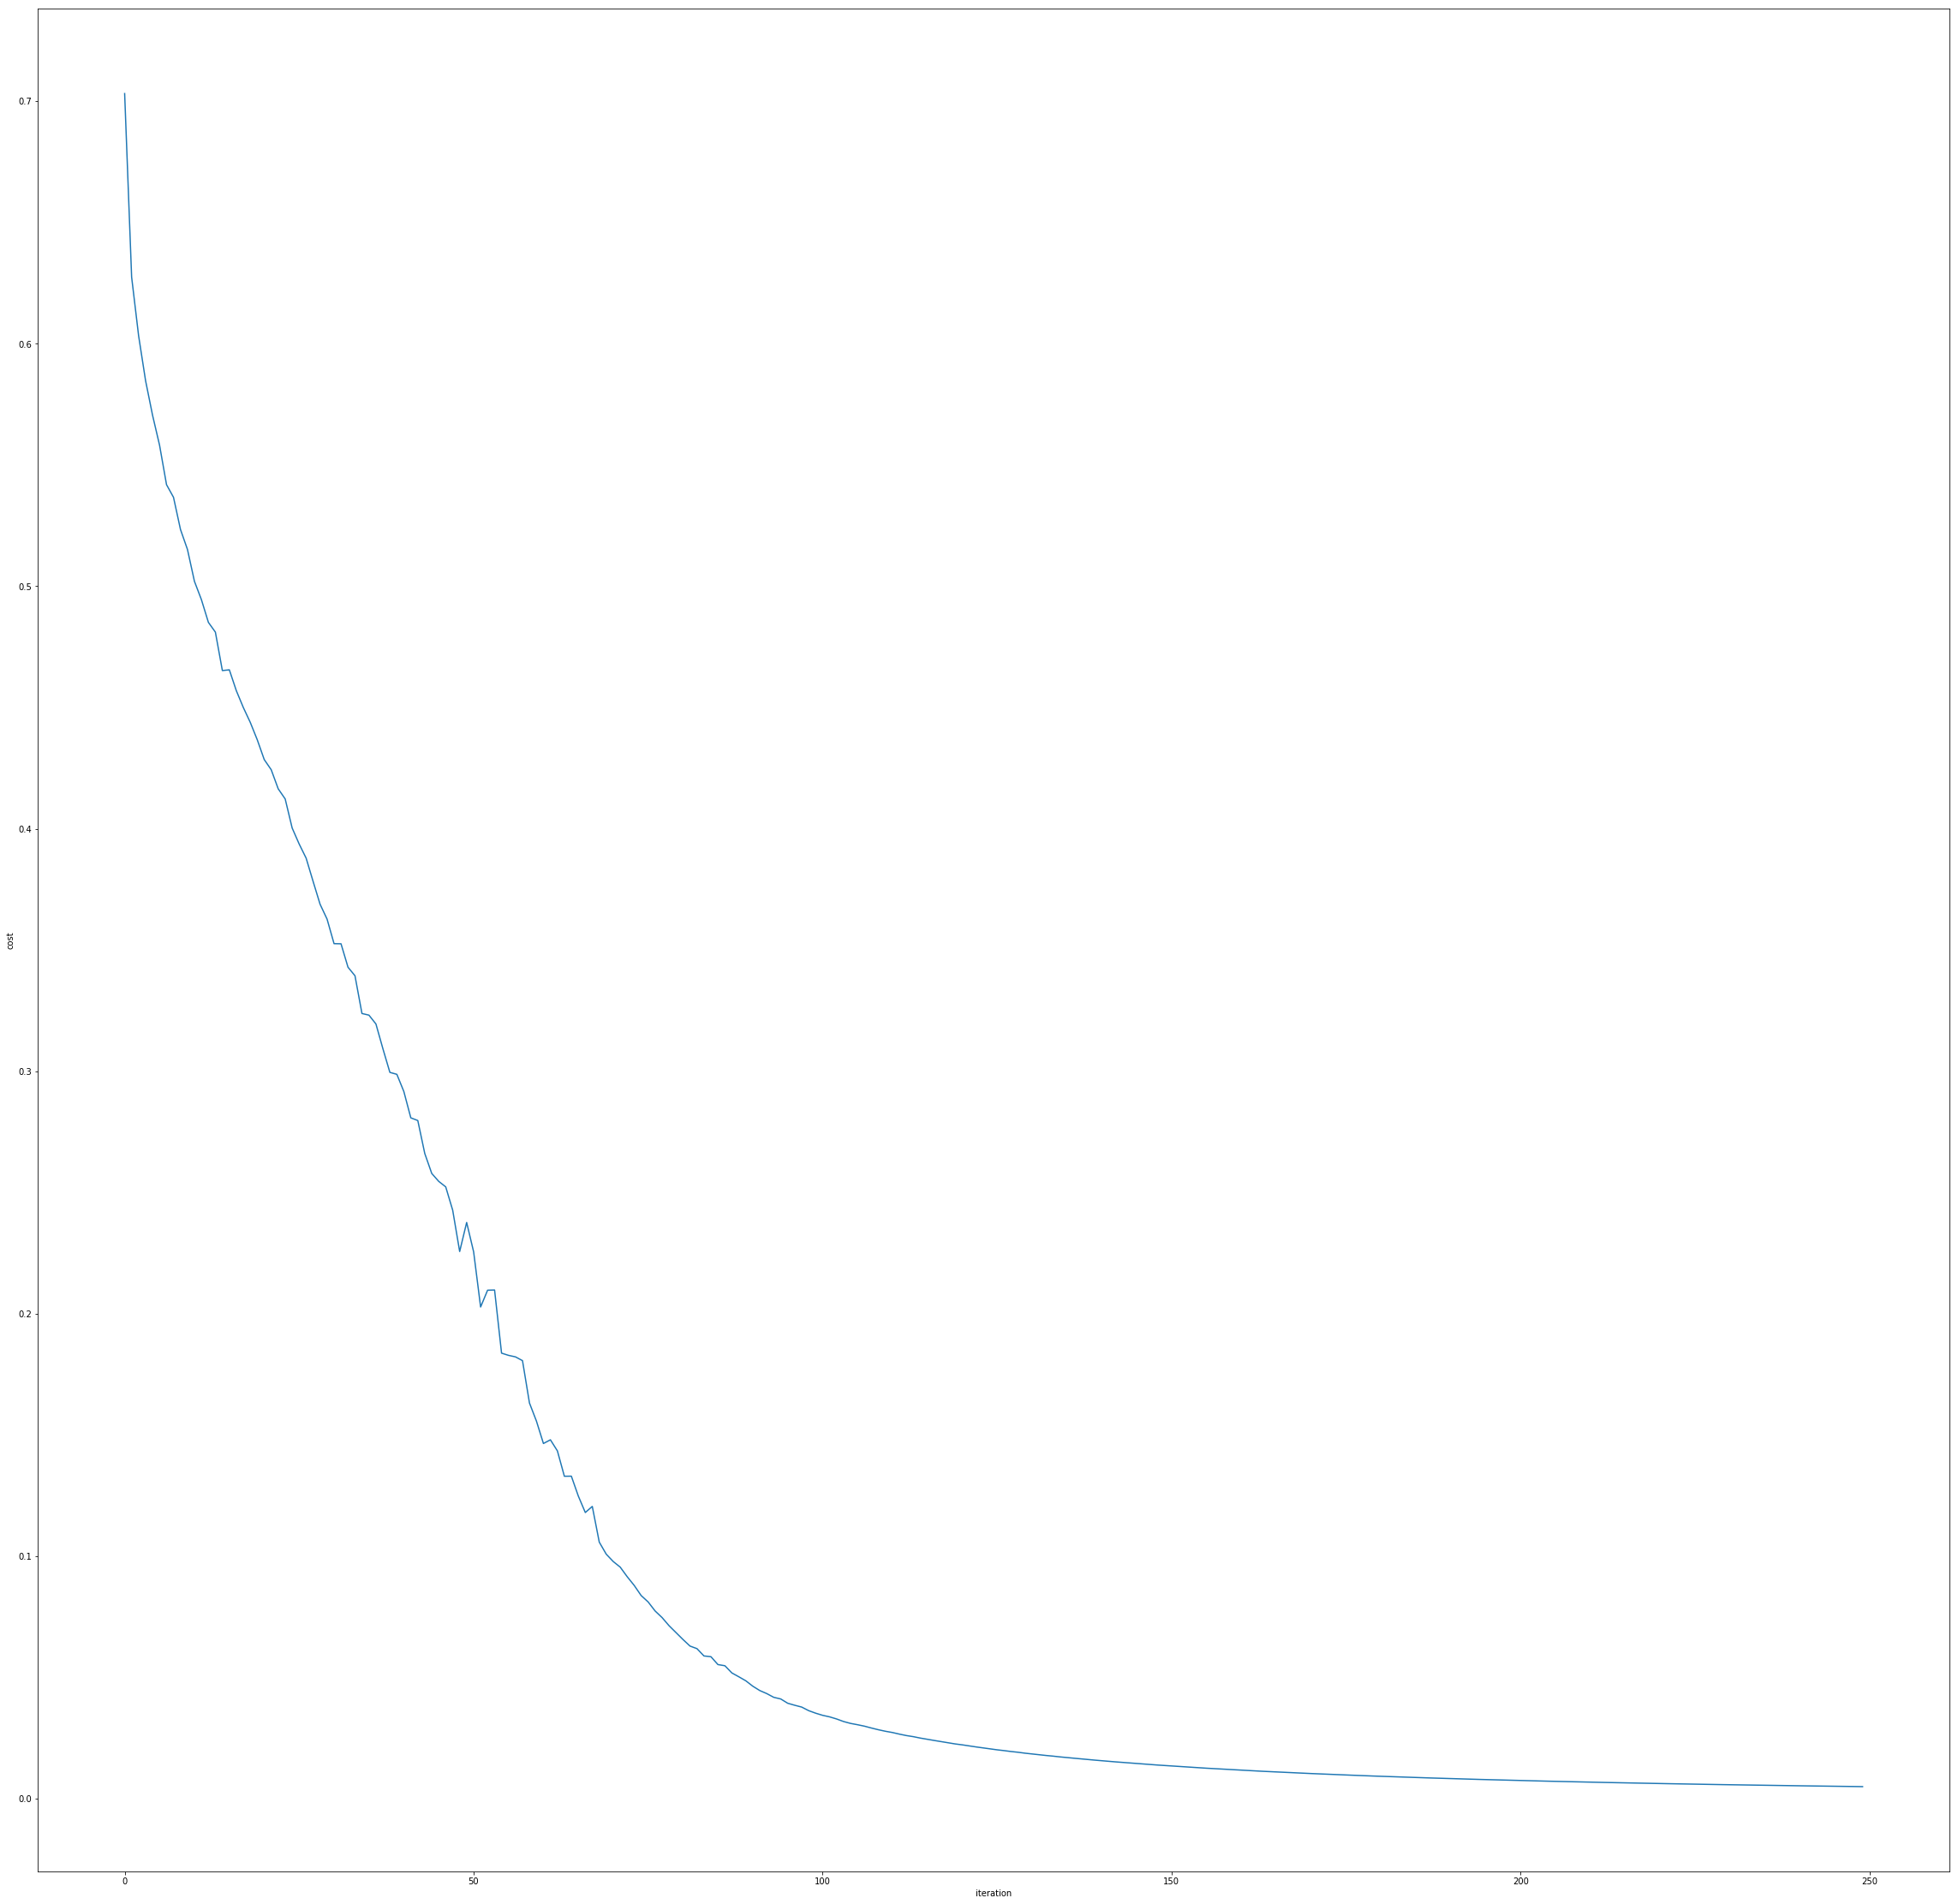

Accuracy: 0.9999999999999998
Accuracy: 0.78


In [0]:
layers_exp = [64*64*3, 120, 12, 1]
parameters_exp = L_layers_models(train_x, train_y, layers_exp , n_iter = 2500, print_cost=True)
predict_exp_train = predict(train_x, train_y, parameters_exp)
predict_exp_test = predict(test_x, test_y, parameters_exp)